In [1]:
import nest_asyncio
nest_asyncio.apply()

from mutabledataset import SimpleDataset
from agent import RationalAgent
from simulation import Simulation
from learner import LogisticLearner
import plot
import numpy as np
from learner import StatisticalParityLogisticLearner
from learner import FairLearnLearner
from learner import RejectOptionsLogisticLearner
from learner import ReweighingLogisticLearner
import matplotlib.pyplot as plt
import seaborn as sns

mutable_attr = 'x'
def do_sim(learner):
    cost_lambda = lambda x_new, x: pow(x_new/2.,2.)+3*abs(x_new-x)/4. #lambda x_new, x: x_new/2.+1*abs(x_new-x)/4.
    cost_fixed = lambda size: np.abs(np.random.normal(loc=0.5,scale=0.5,size=size))


    g = SimpleDataset(mutable_features=['x'],
            domains={'x': 'auto'},
            discrete=['x'],
            cost_fns={'x': cost_lambda})


    sim = Simulation(g,
                     RationalAgent,
                     learner,
                     cost_fixed)

    result_set = sim.start_simulation(runs=3)
    return result_set

def print_stats(result_set, name):
    print(result_set)
    print("StatPar Δ:", round(result_set.stat_parity_diff({'group': 0}, {'group': 1}),2))
    pre_up_mean, pre_up_std, post_up_mean, post_up_std = tuple(map(lambda x: round(x,2),result_set.feature_average(mutable_attr, {'group':0})))
    pre_p_mean, pre_p_std, post_p_mean, post_p_std = tuple(map(lambda x: round(x,2),result_set.feature_average(mutable_attr, {'group':1})))
    diff = abs(post_up_mean - post_p_mean)
    print("Feature x (mean):")
    print("(UP) Pre :", pre_up_mean, "(+-", pre_up_std, ")")
    print("(P) Pre  :", pre_p_mean, "(+-", pre_p_std, ")")
    print("(UP) Post:", post_up_mean, "(+-", post_up_std, ")")
    print("(P) Post :", post_p_mean, "(+-", post_p_std, ")")


    print("Post    Δ:", round(diff, 2))
    
    sns.set()
    plt.figure(name)
    ax = sns.lineplot(x=mutable_attr, y="incentive",hue='group',data=(rs._avg_incentive(mutable_attr, 'group')).reset_index())
    #plt.savefig(name+".png")



privileged_groups = [{'group': 1}]
unprivileged_groups = [{'group': 0}]

No aff. action:
(1000, 2) (1000, 2)
(1000, 2) (1000, 2)
(1000, 2) (1000, 2)
Runs:  3 
 Eps:  0.41  (+-  0.02 ) 
 Acc h:  0.7  (+-  0.01 ) 

0.7383333333333333 0.908
StatPar Δ: 0.17
Feature x (mean):
(UP) Pre : 0.51 (+- 0.02 )
(P) Pre  : 0.69 (+- 0.02 )
(UP) Post: 0.6 (+- 0.02 )
(P) Post : 0.71 (+- 0.02 )
Post    Δ: 0.11




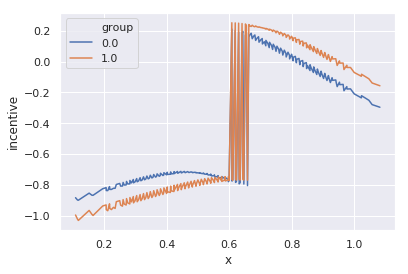

In [2]:
print("No aff. action:")
rs = do_sim(LogisticLearner())
print_stats(rs, "noaff")
print("\n")

Aff. action (Fairlearn learner)
(1000, 2) (1000, 2)
(1000, 2) (1000, 2)
(1000, 2) (1000, 2)
Runs:  3 
 Eps:  0.02  (+-  0.02 ) 
 Acc h:  0.23  (+-  0.02 ) 

0.8526666666666666 0.8183333333333334
StatPar Δ: 0.03
Feature x (mean):
(UP) Pre : 0.51 (+- 0.0 )
(P) Pre  : 0.68 (+- 0.0 )
(UP) Post: 0.55 (+- 0.02 )
(P) Post : 0.73 (+- 0.02 )
Post    Δ: 0.18




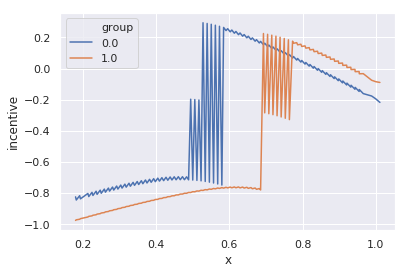

In [7]:
print("Aff. action (Fairlearn learner)")
rs = do_sim(FairLearnLearner(privileged_groups, unprivileged_groups))
print_stats(rs, "in")
print("\n")

Aff. action (Reweighing)
(1000, 2) (1000, 2)
(1000, 2) (1000, 2)
(1000, 2) (1000, 2)
Runs:  3 
 Eps:  0.26  (+-  0.02 ) 
 Acc h:  0.65  (+-  0.02 ) 

0.859 0.8433333333333333
StatPar Δ: 0.02
Feature x (mean):
(UP) Pre : 0.48 (+- 0.0 )
(P) Pre  : 0.64 (+- 0.0 )
(UP) Post: 0.53 (+- 0.0 )
(P) Post : 0.67 (+- 0.0 )
Post    Δ: 0.14




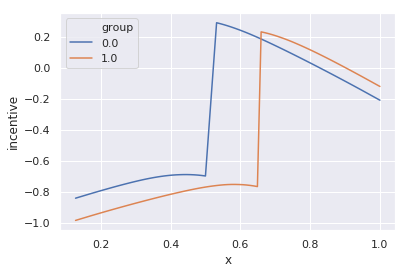

In [4]:
print("Aff. action (Reweighing)")
rs = do_sim(ReweighingLogisticLearner(privileged_groups, unprivileged_groups))
print_stats(rs, "pre")
print("\n")

Aff. action (Reject Option)
(1000, 2) (1000, 2)
(1000, 2) (1000, 2)
(1000, 2) (1000, 2)
Runs:  3 
 Eps:  0.26  (+-  0.03 ) 
 Acc h:  0.23  (+-  0.02 ) 

0.8220000000000001 0.8183333333333334
StatPar Δ: 0.0
Feature x (mean):
(UP) Pre : 0.5 (+- 0.01 )
(P) Pre  : 0.66 (+- 0.02 )
(UP) Post: 0.55 (+- 0.01 )
(P) Post : 0.7 (+- 0.01 )
Post    Δ: 0.15




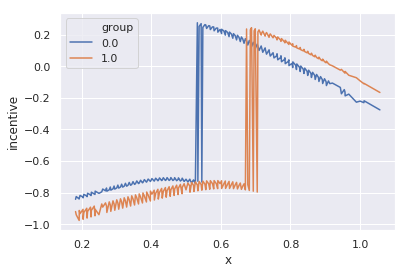

In [5]:
print("Aff. action (Reject Option)")
rs = do_sim(RejectOptionsLogisticLearner(privileged_groups, unprivileged_groups))
print_stats(rs, "post")
print("\n")

Aff. action (DIY Stat. Parity enforcer)
(1000, 2) (1000, 2)
(1000, 2) (1000, 2)
(1000, 2) (1000, 2)
Runs:  3 
 Eps:  0.1  (+-  0.06 ) 
 Acc h:  0.33  (+-  0.01 ) 

0.9096666666666667 0.8963333333333333
StatPar Δ: 0.01
Feature x (mean):
(UP) Pre : 0.48 (+- 0.01 )
(P) Pre  : 0.66 (+- 0.01 )
(UP) Post: 0.51 (+- 0.01 )
(P) Post : 0.68 (+- 0.01 )
Post    Δ: 0.17


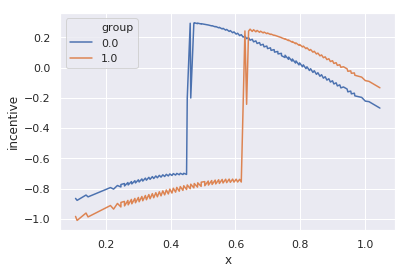

In [6]:
print("Aff. action (DIY Stat. Parity enforcer)")
rs = do_sim(StatisticalParityLogisticLearner(privileged_groups, unprivileged_groups, eps=0.001))
print_stats(rs, "postDIY")